<a href="https://colab.research.google.com/github/Merna177/InceptionV2/blob/master/Vision_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Reading the data

**Labels**:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


50000 example  for training and 10000 for testing 

Using one hot coding for the labels to be used in keras model


In [0]:

from matplotlib import pyplot
from keras.datasets import cifar10
import keras
def load_data():
 # load dataset
 (xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
 ytrain = keras.utils.to_categorical(ytrain,10)
 ytest = keras.utils.to_categorical(ytest,10)
 return xtrain,ytrain,xtest,ytest


Normalize the data by dividing each pixel by the max value(255)


In [0]:
def normalizeData(xtrain,xtest):
  xtrain = xtrain.astype('float32')
  xtest = xtest.astype('float32')
  # normalize to range (0,1)
  xtrain = xtrain / 255.0
  xtest = xtest / 255.0
  return xtrain,xtest

show some images 

In [0]:
def show_images(xtrain):
  k = 0
  for i in range(0,4):
    for j in range(0,4):
      pyplot.subplot2grid((4,4),(i,j))
      pyplot.imshow((xtrain[k]))
      k = k+1
  pyplot.show()


In [0]:
xtrain,ytrain,xtest,ytest = load_data()
show_images(xtrain[:16])
xtrain,xtest = normalizeData(xtrain,xtest)
print("xtrain shape",xtrain.shape)
print("xtest shape",xtest.shape)


170500096/170498071 [==============================] - 2s 0us/step


NameError: ignored

Implementing model's architecture 

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Flatten, Conv2D, Dropout,MaxPooling2D
def create_model():
 model = Sequential()
 model.add(Conv2D(filters=32, kernel_size=3, input_shape=(32,32,3)))
 model.add(Conv2D(filters=32, kernel_size=3))
 model.add(MaxPooling2D(pool_size=2 ))
 model.add(Dropout(0.2))
 model.add(Conv2D(filters=64, kernel_size=3))
 model.add(Conv2D(filters=64, kernel_size=3))
 model.add(MaxPooling2D(pool_size=2 ))
 model.add(Dropout(0.2))
 model.add(Flatten())
 model.add(Dense(256, activation='relu'))
 model.add(Dense(10, activation='softmax'))
 return model

In [0]:
print(xtrain[0].shape)
model = create_model()

(32, 32, 3)


fit the model

In [0]:
from keras.optimizers import adam
op = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=60, batch_size=50, verbose =2,validation_split=0.1, callbacks =[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])

Train on 45000 samples, validate on 5000 samples
Epoch 1/60
 - 25s - loss: 1.4047 - acc: 0.5017 - val_loss: 1.0684 - val_acc: 0.6248
Epoch 2/60
 - 17s - loss: 1.0199 - acc: 0.6456 - val_loss: 0.9407 - val_acc: 0.6740
Epoch 3/60
 - 17s - loss: 0.8804 - acc: 0.6960 - val_loss: 0.8772 - val_acc: 0.7026
Epoch 4/60
 - 17s - loss: 0.7850 - acc: 0.7293 - val_loss: 0.8962 - val_acc: 0.7000
Epoch 5/60
 - 17s - loss: 0.7031 - acc: 0.7546 - val_loss: 0.8798 - val_acc: 0.6976
Epoch 6/60
 - 17s - loss: 0.6384 - acc: 0.7771 - val_loss: 0.8564 - val_acc: 0.7232
Epoch 7/60
 - 17s - loss: 0.5756 - acc: 0.7989 - val_loss: 0.9673 - val_acc: 0.7114
Epoch 8/60


KeyboardInterrupt: ignored

predict test data

In [0]:
predTest = model.predict_classes(xtest,batch_size = 10)
score = model.evaluate(xtest, ytest, verbose=0, batch_size=10)
print('loss','accuracy:')
print(score)


plotting accuracy

In [0]:
# plot diagnostic learning curves
def summarize(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='blue', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')


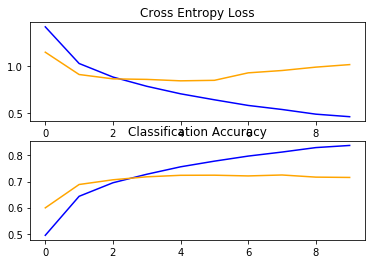

In [0]:
summarize(history)

# Inception Model V2

In [0]:
from  math import ceil
n = len(xtrain)
xrtrain = xtrain[ceil(n*0.1):]
yrtrain = ytrain[ceil(n*0.1):]
xvalidation = xtrain[0:math.ceil(n * 0.1)]
yvalidation = ytrain[0:math.ceil(n * 0.1)]

In [0]:
from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.optimizers import Adam,SGD
from keras.layers import Input,Dense, Activation, Flatten, Conv2D, Dropout,MaxPooling2D,concatenate,AveragePooling2D
import tensorflow as tf
import keras
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)
def inception_module_first(inputLayer):
  layer1 =  Conv2D(128,(1,1),strides=2,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)

  layer2 = AveragePooling2D((1,1),padding='same')(inputLayer)
  layer2 =  Conv2D(128,(1,1),strides=2,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer2)
    
  layer3 =  Conv2D(128,(1,1),strides=2,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)
  layer3 = Conv2D(256,(3,3),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer3)

  layer4 = Conv2D(128,(1,1),strides=2,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)
  layer4 =  Conv2D(128,(3,3),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)
  layer4 = Conv2D(256,(3,3),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)

  output = concatenate([layer1,layer2,layer3,layer4],axis=3)
  print("output",output);
  return output
def inception_module_second(inputLayer):
    layer1= Conv2D(64,(1,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)

    layer2 = MaxPooling2D((1,1),padding='same')(inputLayer)
    layer2 =  Conv2D(64,(1,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer2)

    layer3 = Conv2D(64,(1,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)
    layer3 = Conv2D(64,(1,5),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer3)
    layer3 = Conv2D(64,(5,1),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer3)

    layer4 = Conv2D(64,(1,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)
    layer4 = Conv2D(64,(1,5),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)
    layer4 = Conv2D(64,(5,1),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)
    layer4 = Conv2D(64,(1,5),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)
    layer4 = Conv2D(64,(5,1),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)

    output = concatenate([layer1,layer2,layer3,layer4],axis=3)
    print("outpput figure 6",output)
    return output

def inception_module_third(inputLayer):
  layer1= Conv2D(64,(1,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)

  layer2 = AveragePooling2D((1,1),padding='same')(inputLayer)
  layer2 =  Conv2D(64,(1,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer2)

  layer3 = Conv2D(64,(1,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)
  layer3p1 = Conv2D(64,(1,3),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer3)
  layer3p2 = Conv2D(64,(3,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer3)
  
  layer4 =  Conv2D(64,(1,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(inputLayer)
  layer4 = Conv2D(64,(3,3),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)
  layer4p1 = Conv2D(64,(1,3),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)
  layer4p2 = Conv2D(64,(3,1),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer4)
  
  output = concatenate([layer1,layer2,layer3p1,layer3p2,layer4p1,layer4p2],axis=3)
  print("output figure 7",output)
  return output




In [0]:

def InceptionV2(input_image):
  layer1= Conv2D(32,(3,3),strides=2,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(input_image)
  print("layer1",layer1)

  layer1= Conv2D(32,(3,3),strides=1,padding='valid',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer1)
  print("layer2",layer1)

  layer1=Conv2D(64,(3,3),strides=1,padding='same',activation = 'relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer1)
  print("layer3",layer1)

  layer1 = MaxPooling2D((3,3),strides=2,padding='same')(layer1)
  print("layer4",layer1)
  x1 =  Flatten()(layer1)
  x1 = Dense(1024, activation='relu')(x1)
  x1 = Dropout(0.2)(x1)
  x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)
  layer1 = Conv2D(80,(3,3),strides=1,padding='valid',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer1)
  print("layer5",layer1)

  layer1= Conv2D(192,(3,3),strides=2,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer1)
  print("layer6",layer1)

  layer1 = Conv2D(288,(3,3),strides=1,padding='same',activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(layer1)
  print("layer7",layer1)
  x2 =  Flatten()(layer1)
  x2 = Dense(1024, activation='relu')(x2)
  x2 = Dropout(0.7)(x2)
  x2 = Dense(10, activation='softmax',name='auxilliary_output_2')(x2)
  layer1 = inception_module_first(layer1)
  layer1 = inception_module_first(layer1)
  layer1 = inception_module_first(layer1)

  layer1 = inception_module_second(layer1)
  layer1 = inception_module_second(layer1)
  layer1 = inception_module_second(layer1)
  layer1 = inception_module_second(layer1)
  layer1 = inception_module_second(layer1)
  layer1 = inception_module_third(layer1)
  layer1 = inception_module_third(layer1)

  layer1 = AveragePooling2D((2,2),strides=2,padding='same')(layer1)
  layer1 = Flatten()(layer1)

  predictions = Dense(10, activation='softmax',name='final_prediction')(layer1)
  return x1,x2,predictions 



In [0]:
import numpy as np
#xtrain = np.resize(xtrain,(50000,100,100,3))
print(xtrain.shape)
#xtest = np.resize(xtest,(10000,100,100,3))
input_image = Input(shape=(32,32,3))
output_inception_v2,x1,x2 = InceptionV2(input_image)
print(output_inception_v2,x1,x2)


(50000, 32, 32, 3)
layer1 Tensor("conv2d_685/Relu:0", shape=(?, 16, 16, 32), dtype=float32)
layer2 Tensor("conv2d_686/Relu:0", shape=(?, 14, 14, 32), dtype=float32)
layer3 Tensor("conv2d_687/Relu:0", shape=(?, 14, 14, 64), dtype=float32)
layer4 Tensor("max_pooling2d_74/MaxPool:0", shape=(?, 7, 7, 64), dtype=float32)
layer5 Tensor("conv2d_688/Relu:0", shape=(?, 5, 5, 80), dtype=float32)
layer6 Tensor("conv2d_689/Relu:0", shape=(?, 3, 3, 192), dtype=float32)
layer7 Tensor("conv2d_690/Relu:0", shape=(?, 3, 3, 288), dtype=float32)
output Tensor("concatenate_71/concat:0", shape=(?, 2, 2, 768), dtype=float32)
output Tensor("concatenate_72/concat:0", shape=(?, 1, 1, 768), dtype=float32)
output Tensor("concatenate_73/concat:0", shape=(?, 1, 1, 768), dtype=float32)
outpput figure 6 Tensor("concatenate_74/concat:0", shape=(?, 1, 1, 256), dtype=float32)
outpput figure 6 Tensor("concatenate_75/concat:0", shape=(?, 1, 1, 256), dtype=float32)
outpput figure 6 Tensor("concatenate_76/concat:0", shape=

In [0]:

inceptionV2Model= Model(inputs=input_image,outputs =[output_inception_v2 ,x1,x2])
print(inceptionV2Model.summary())

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_685 (Conv2D)             (None, 16, 16, 32)   896         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_686 (Conv2D)             (None, 14, 14, 32)   9248        conv2d_685[0][0]                 
__________________________________________________________________________________________________
conv2d_687 (Conv2D)             (None, 14, 14, 64)   18496       conv2d_686[0][0]                 
____________________________________________________________________________________________

In [0]:
from keras.callbacks import LearningRateScheduler
initial_lrate = 0.01
import math
import timeit

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

inceptionV2Model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
start = timeit.default_timer()
history = inceptionV2Model.fit(xtrain, [ytrain,ytrain,ytrain], epochs=50, batch_size=256, verbose =2,validation_data=(xvalidation, [yvalidation, yvalidation, yvalidation]), callbacks =[lr_sc])
stop = timeit.default_timer()
print('Time taken to train the model:' ,stop - start)

Train on 50000 samples, validate on 5000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
 - 48s - loss: 6.1732 - auxilliary_output_1_loss: 1.8898 - auxilliary_output_2_loss: 2.0663 - final_prediction_loss: 2.2171 - auxilliary_output_1_acc: 0.3127 - auxilliary_output_2_acc: 0.2287 - final_prediction_acc: 0.1391 - val_loss: 5.2945 - val_auxilliary_output_1_loss: 1.5529 - val_auxilliary_output_2_loss: 1.7464 - val_final_prediction_loss: 1.9952 - val_auxilliary_output_1_acc: 0.4544 - val_auxilliary_output_2_acc: 0.3644 - val_final_prediction_acc: 0.1972
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
 - 26s - loss: 4.8253 - auxilliary_output_1_loss: 1.4036 - auxilliary_output_2_loss: 1.5912 - final_prediction_loss: 1.8306 - auxilliary_output_1_acc: 0.4958 - auxilliary_output_2_acc: 0.4137 - final_prediction_acc: 0.2818 - val_loss: 4.1265 - val_auxilliary_output_1_loss: 1.2101 - val_auxilliary_output_2_loss: 1.3603 - val_fi

In [0]:
score = inceptionV2Model.evaluate(xtest, [ytest,ytest,ytest], verbose=0, batch_size=10)
print('loss','accuracy:')
print(score)


loss accuracy:
[2.302591649532318, 0.1000000018775463]
